In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8610 - loss: 0.4531 - val_accuracy: 0.9826 - val_loss: 0.0589
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9772 - loss: 0.0763 - val_accuracy: 0.9866 - val_loss: 0.0430
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9859 - loss: 0.0488 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9897 - val_loss: 0.0387
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9883 - loss: 0.0344 - val_accuracy: 0.9892 - val_loss: 0.0366
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9906 - val_loss: 0.0392
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9922 - loss: 0.0231 - val_accuracy: 0.9887 - val_loss: 0.0419
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy:

In [7]:
model.save_weights('digit.weights.h5')
model.save('digit.h5')

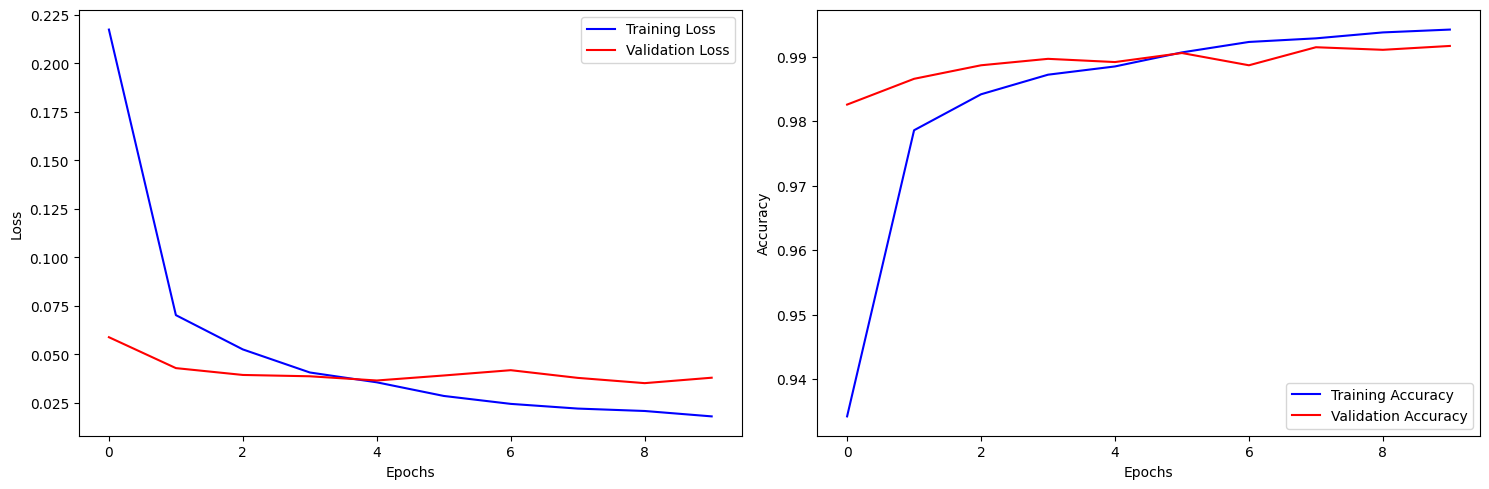

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

fig.tight_layout()
plt.show()

In [9]:
lose, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', lose)
print('Test accuracy:', accuracy)

Test loss: 0.030413193628191948
Test accuracy: 0.9904999732971191


In [10]:
from tensorflow.keras.metrics import F1Score

f1_score = F1Score(average="weighted")
f1_score.update_state(y_test, model.predict(x_test))
f1_score.result().numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9905

In [11]:
from tensorflow.math import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)
confusion_matrix(y_true_classes, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    1,    0,    0,    1,    0,    2,    0],
       [   0, 1131,    1,    0,    0,    1,    1,    0,    1,    0],
       [   1,    1, 1025,    0,    0,    0,    0,    4,    1,    0],
       [   0,    0,    2, 1002,    0,    5,    0,    0,    1,    0],
       [   0,    0,    0,    0,  975,    0,    3,    0,    1,    3],
       [   0,    0,    1,    4,    0,  882,    4,    0,    1,    0],
       [   3,    1,    1,    0,    1,    1,  948,    0,    3,    0],
       [   0,    2,   11,    2,    0,    1,    0, 1010,    1,    1],
       [   2,    0,    2,    1,    0,    0,    0,    2,  966,    1],
       [   2,    1,    0,    0,    3,    2,    0,    3,    8,  990]],
      dtype=int32)>